In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
df = pd.read_csv('SeawardIVcurves.csv',header=1)
columns_to_remove = ['Riso (MOhm)', 'Viso (V)', 'Iclamp (Amp)', 'ac/dc']
df = df.drop(columns=columns_to_remove)
# df[:3]

In [4]:
df = df.assign(Index=df['Index'].replace('', np.nan))
df = df.dropna(subset=['Index'])
df

,Index,TestType,Rpe (Ohm),Voc (VDC),Isc (ADC),Irr (W/m2),Ta (C),Tpv (C),HH:MM:SS,DD/MM/YYYY,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55
0,1,16,NaN,21.6,10.180,991,NaN,55.7,20:47:41,27/1/2012,...,19.060:4.741:0:28:0:35920,19.711:3.648:0:29:0:35320,20.234:2.709:0:30:0:34720,20.631:1.940:0:31:0:34120,20.940:1.328:0:32:0:33520,21.174:0.878:0:33:0:32920,21.343:0.549:0:34:0:32320,21.620:0.000:0:37:0:2,00,CB67
1,2,16,NaN,21.8,10.140,988,NaN,57.2,0:00:00,NaN,...,19.807:3.672:0:28:0:35320,20.357:2.724:0:29:0:34720,20.772:1.962:0:30:0:34120,21.090:1.352:0:31:0:33520,21.337:0.887:0:32:0:32920,21.502:0.553:0:33:0:32320,21.790:0.000:0:36:0:2,00,C38B,NaN
2,3,16,NaN,21.6,9.878,966,NaN,56.6,21:00:27,27/1/2012,...,19.402:4.600:0:28:0:35760,20.400:2.614:0:29:0:34560,20.745:1.875:0:30:0:33960,21.001:1.285:0:31:0:33360,21.183:0.846:0:32:0:32760,21.310:0.527:0:33:0:32160,21.560:0.000:0:36:0:2,00,C4FE,NaN
3,4,16,NaN,21.6,9.937,974,NaN,58.1,0:00:00,NaN,...,20.139:2.634:0:28:0:34560,20.562:1.878:0:29:0:33960,20.880:1.277:0:30:0:33360,21.140:0.850:0:31:0:32760,21.289:0.532:0:32:0:32160,21.580:0.000:0:35:0:2,00,BD89,NaN,NaN
4,5,16,NaN,43.5,10.070,929,NaN,59.2,0:00:00,NaN,...,42.901:0.565:0:28:0:32180,43.500:0.000:0:31:0:2,00,A98D,NaN,NaN,NaN,NaN,NaN,NaN
5,6,16,NaN,43.3,9.756,955,NaN,57.2,0:00:00,NaN,...,43.339:0.000:0:30:0:2,00,A401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,16,NaN,43.1,9.961,979,NaN,59.8,0:00:00,NaN,...,42.277:0.831:0:28:0:32620,43.070:0.000:0:31:0:2,00,A935,NaN,NaN,NaN,NaN,NaN,NaN
7,8,16,NaN,43.4,9.658,950,NaN,60.5,21:23:21,27/1/2012,...,42.796:0.517:0:28:0:32020,43.360:0.000:0:31:0:2,00,AB9A,NaN,NaN,NaN,NaN,NaN,NaN
8,9,16,NaN,43.3,9.826,973,NaN,59.2,0:00:00,NaN,...,42.445:0.813:0:28:0:32620,42.757:0.513:0:29:0:32020,43.299:0.000:0:32:0:2,00,AEB0,NaN,NaN,NaN,NaN,NaN
9,10,16,NaN,43.3,9.544,941,NaN,58.2,0:00:00,NaN,...,42.785:0.514:0:28:0:32020,43.280:0.000:0:31:0:2,00,A95F,NaN,NaN,NaN,NaN,NaN,NaN


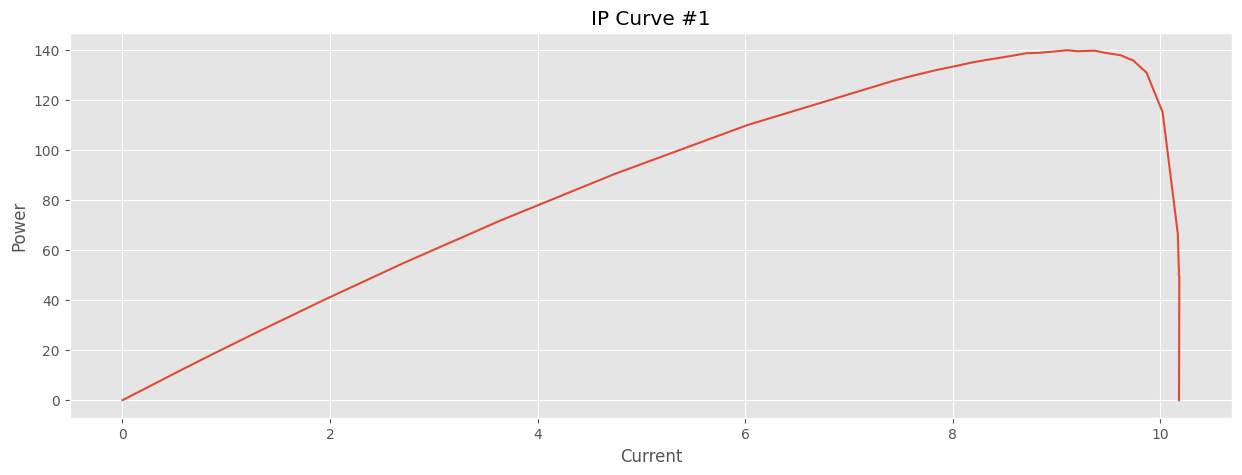

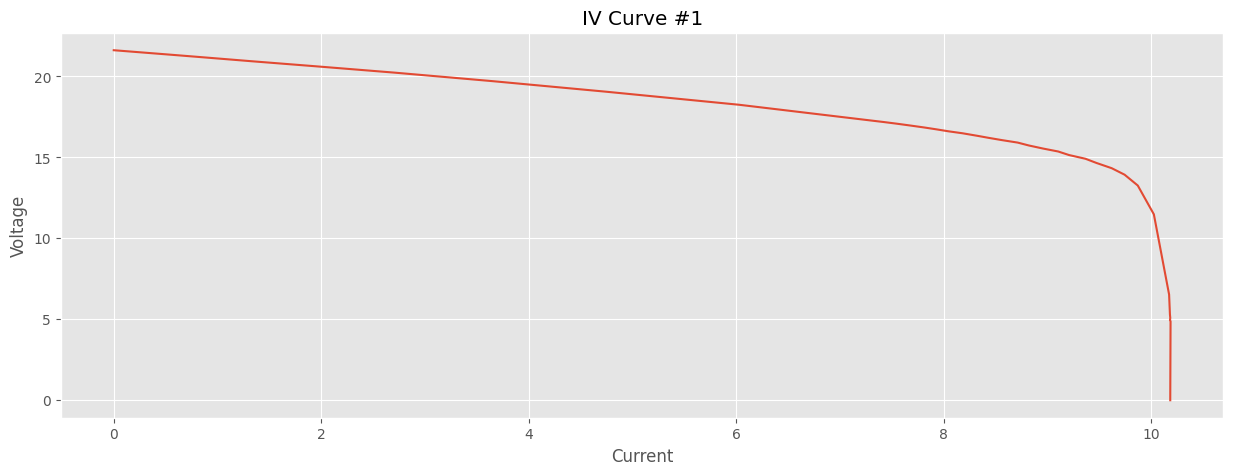

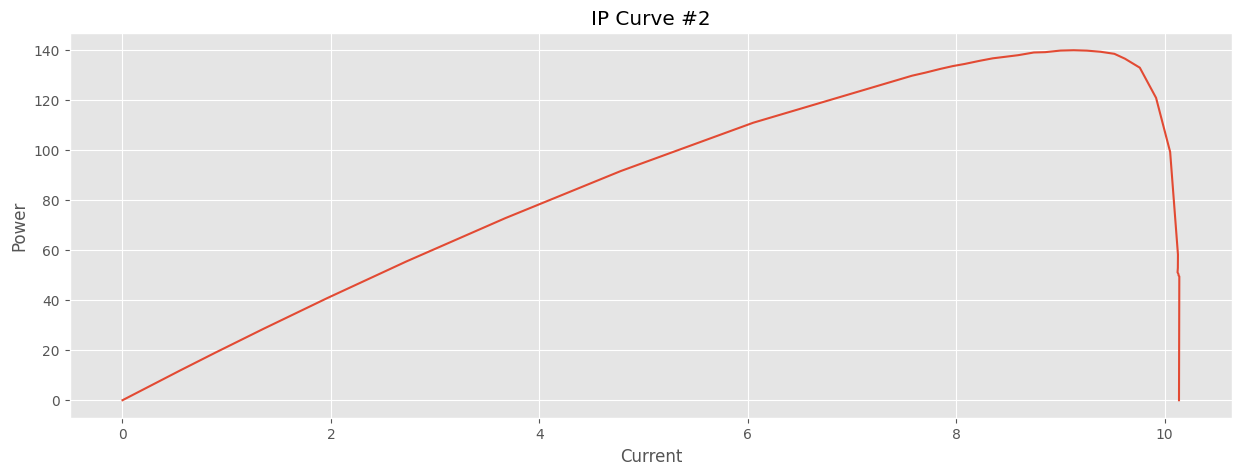

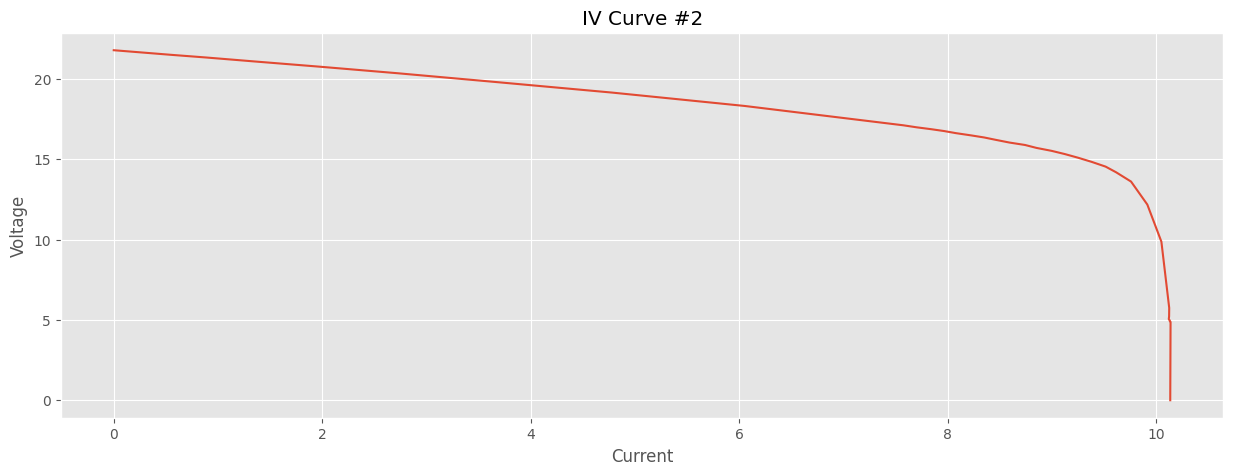

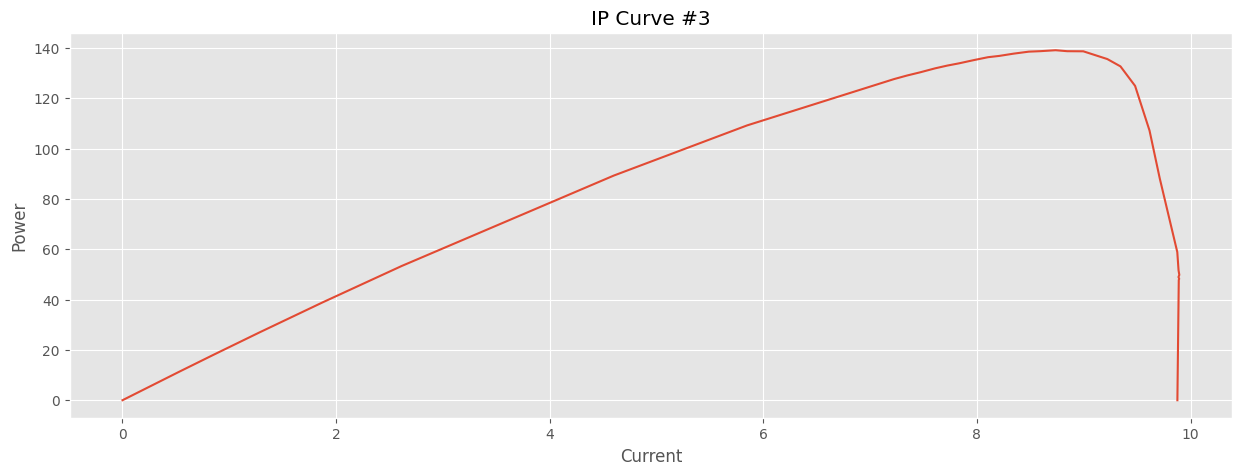

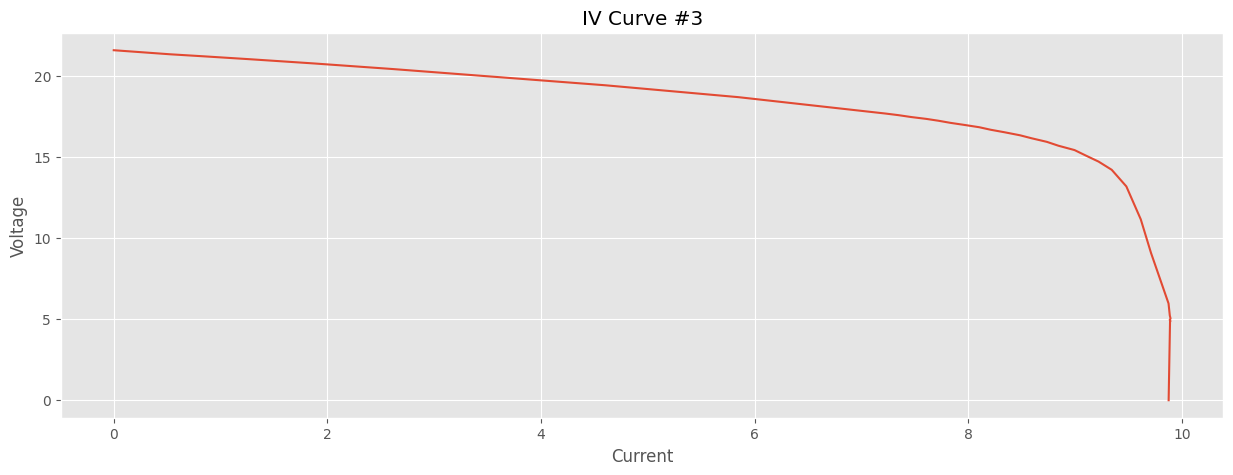

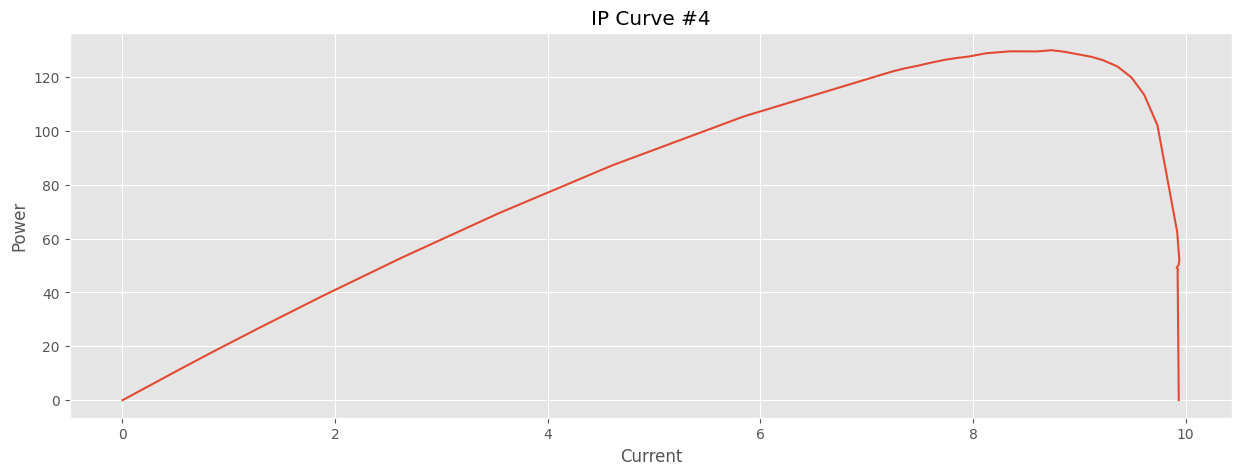

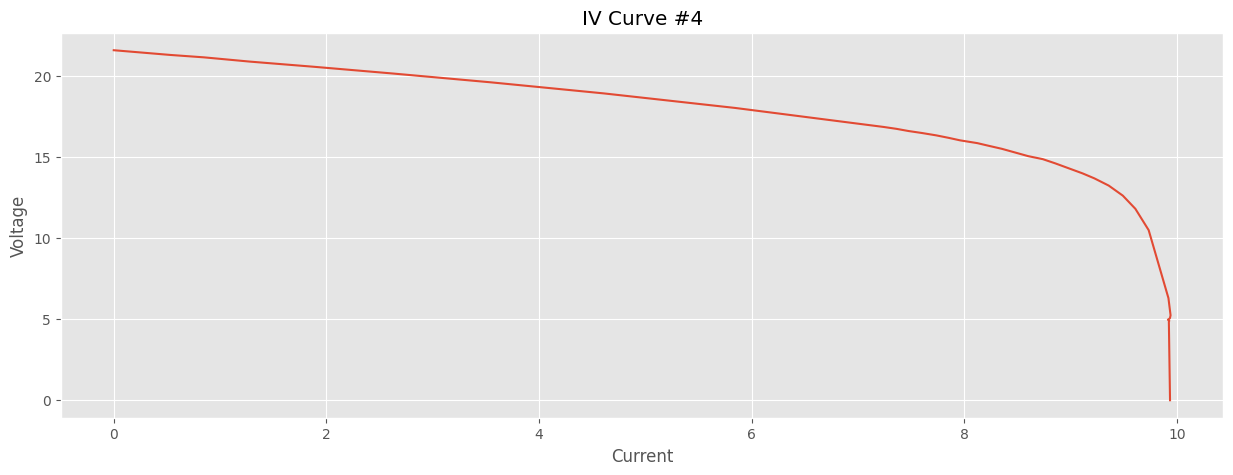

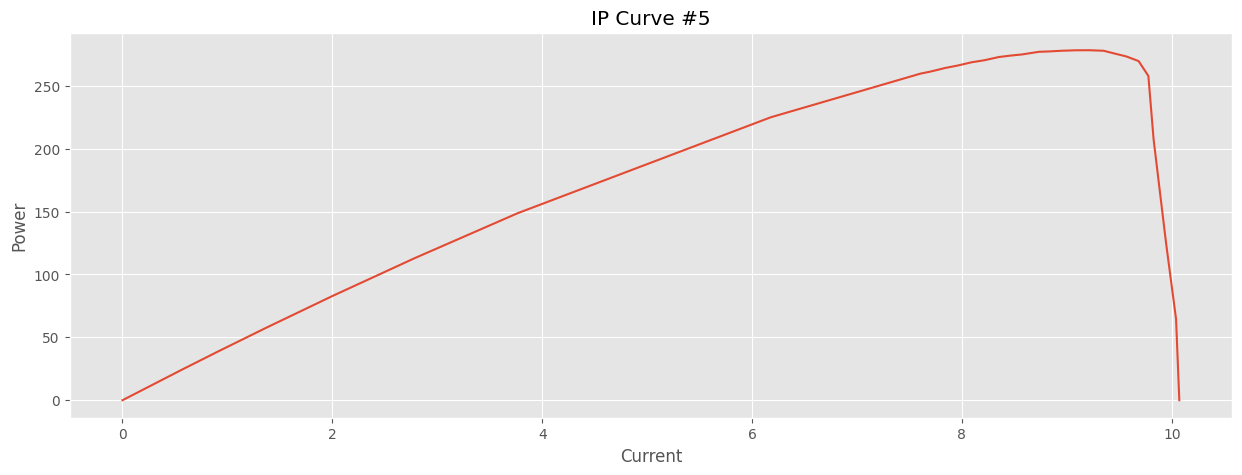

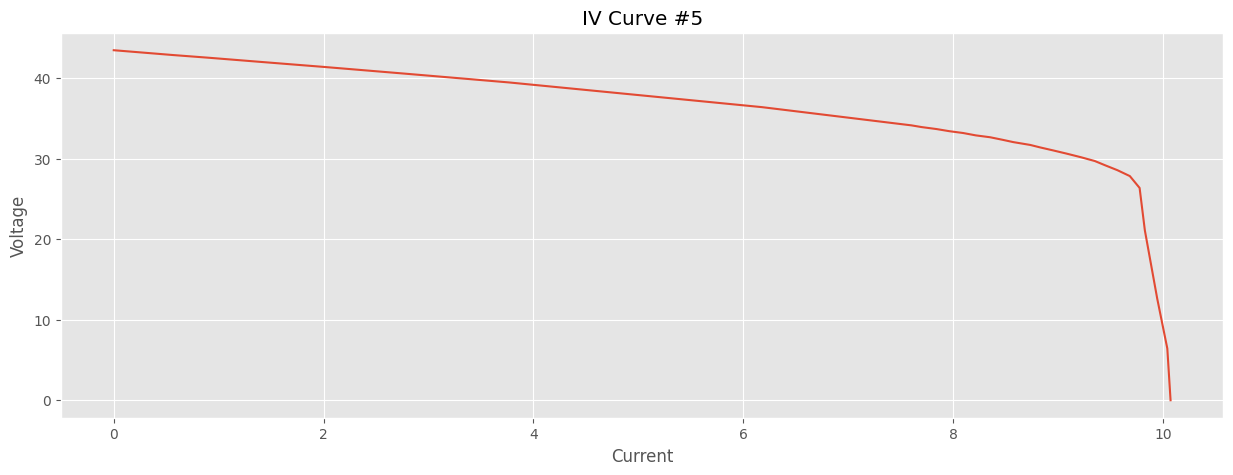

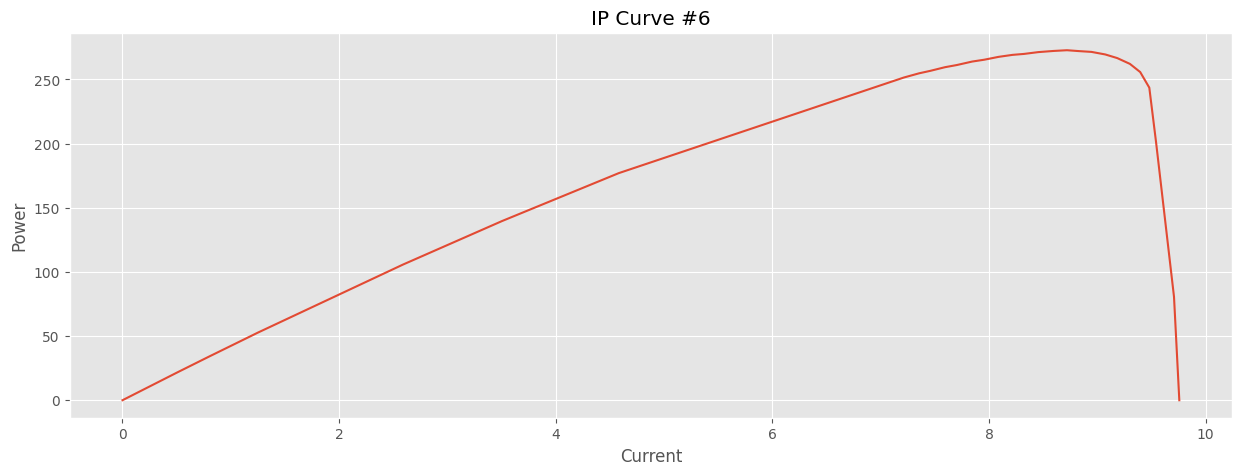

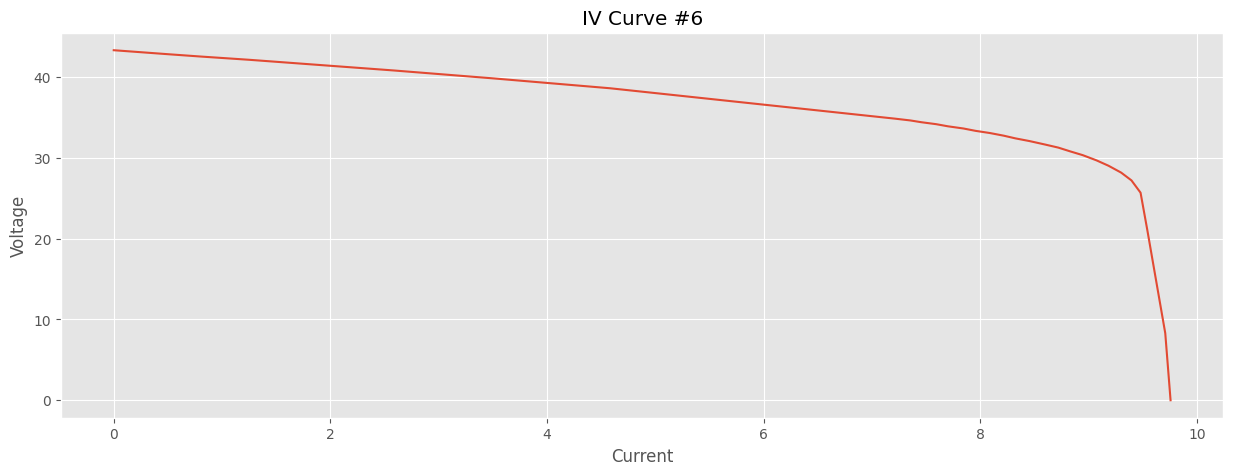

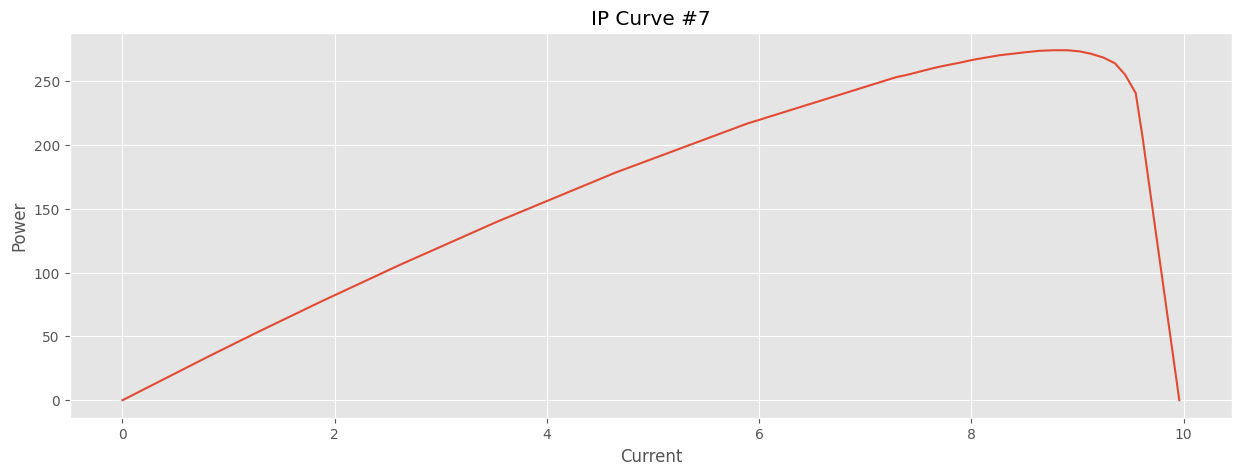

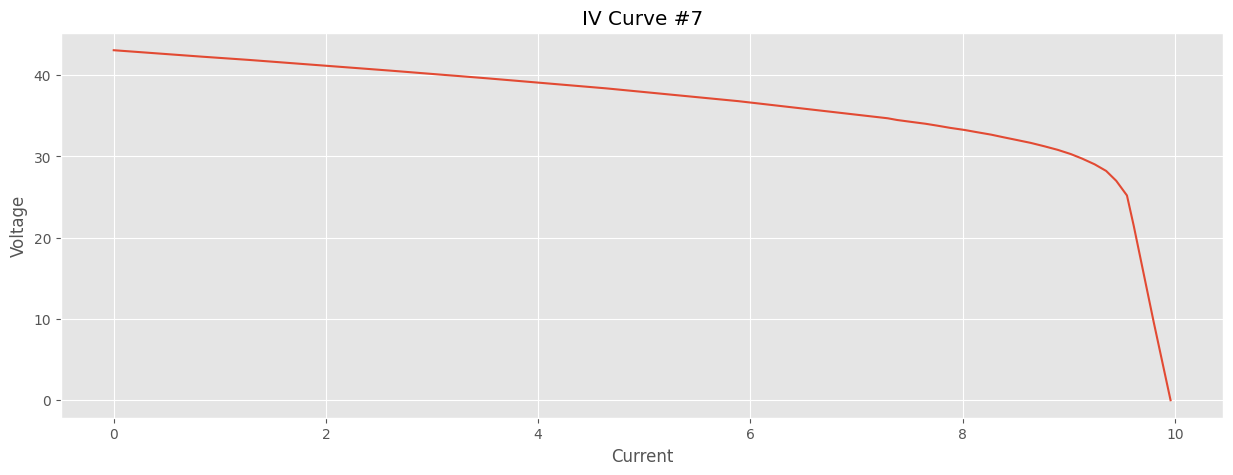

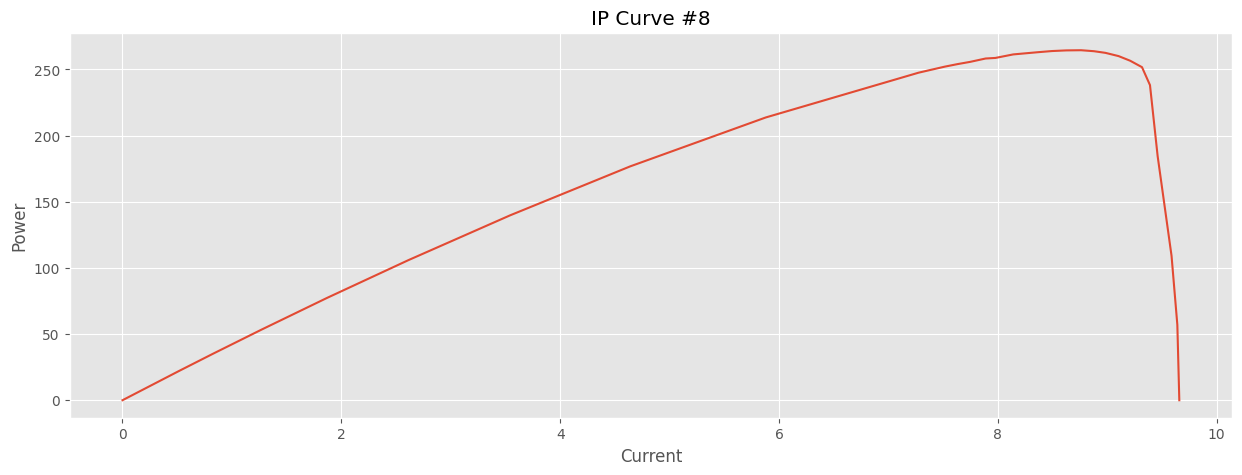

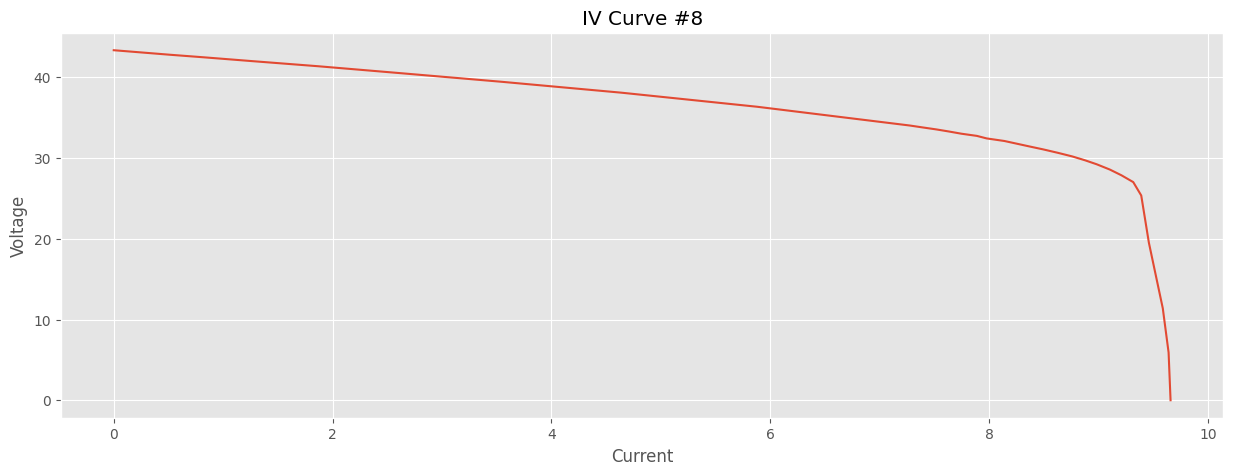

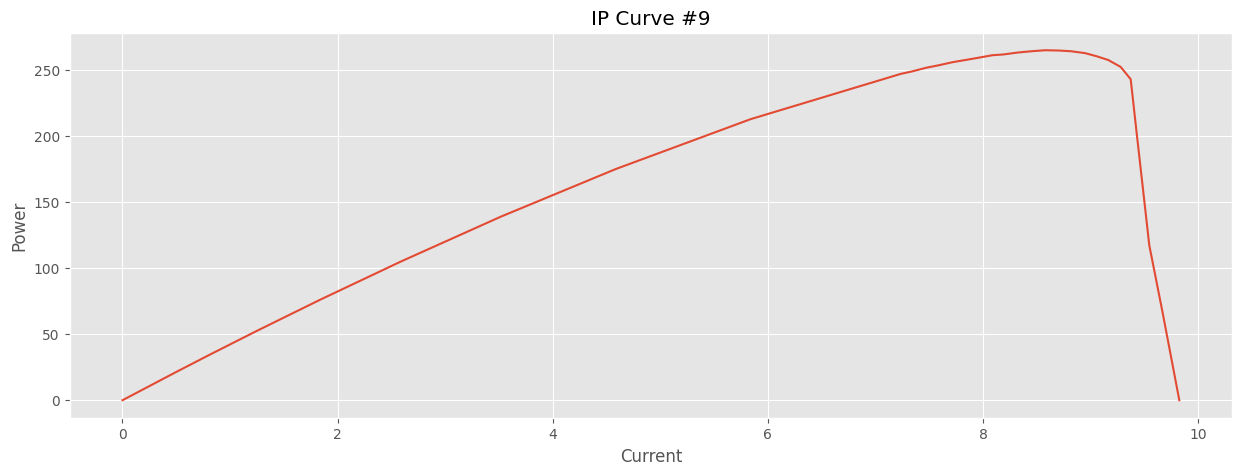

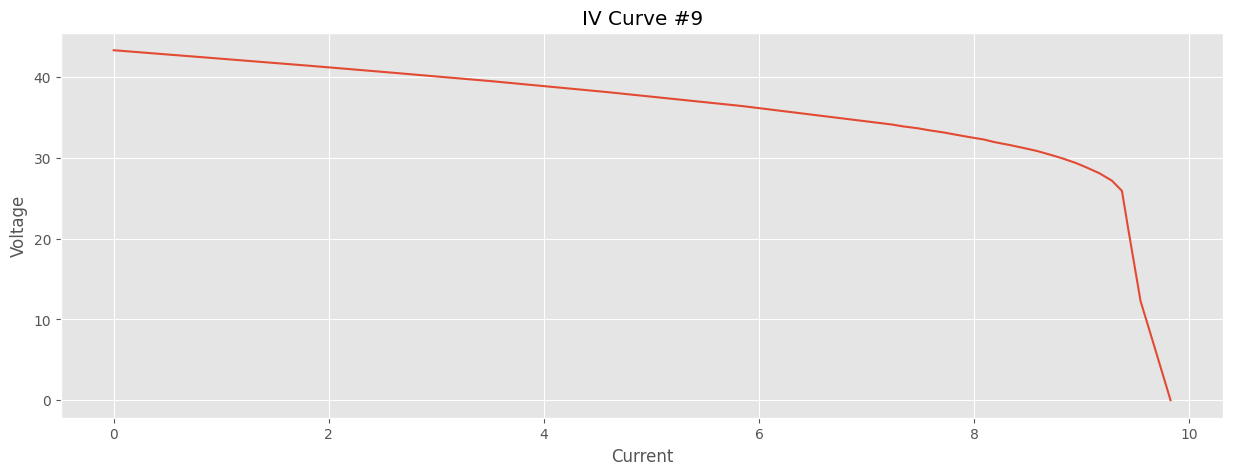

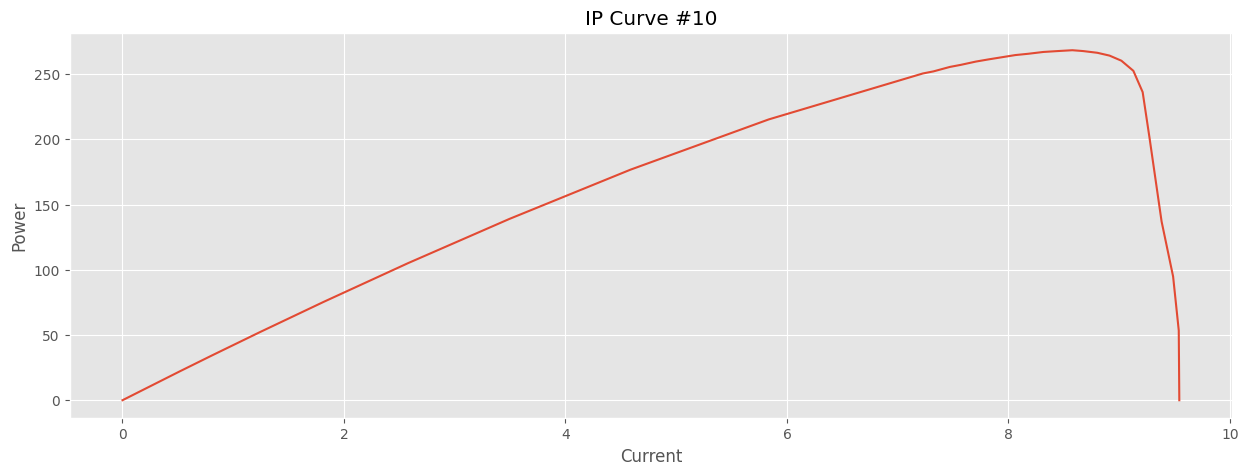

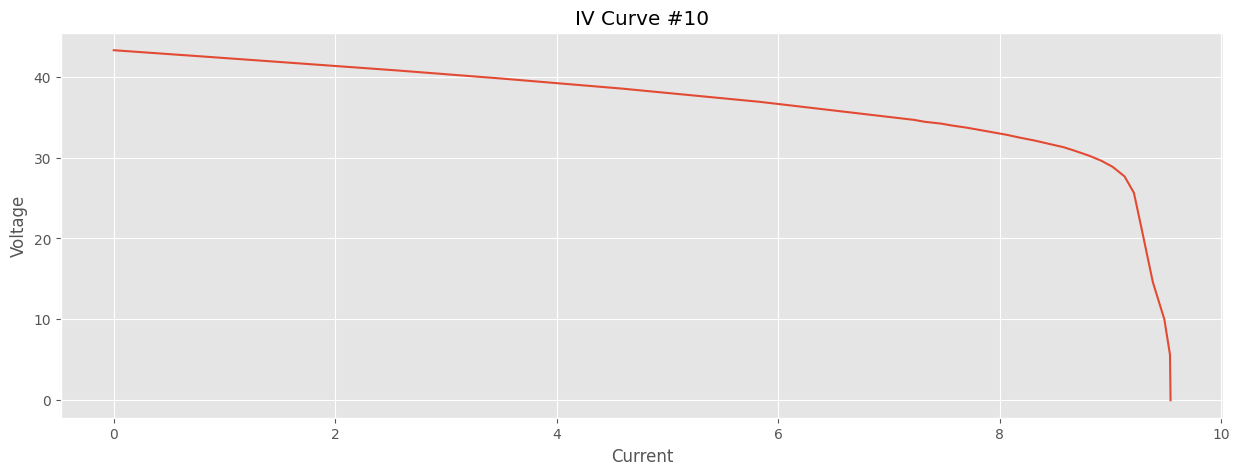

In [13]:
ivcurve_index = df.columns.get_loc('IVCurve')
columns_after_ivcurve = df.columns[ivcurve_index:]
counter = 1
arr = []
for index, row in df.iterrows():
    vlist = []
    ilist = []
    plist = []
    
    
    for point in row[columns_after_ivcurve]:
        if point == 0:
            # print('hit')
            break
        else:
            points = point.split(':')
            # print(points)
            if len(points) == 1:
                # print('ERROR', points, point)
                break
            vlist.append(float(points[0]))
            ilist.append(float(points[1]))
            plist.append(float(points[0])*float(points[1]))
    plt.figure()
    plt.plot(ilist,plist)
    plt.xlabel('Current')
    plt.ylabel('Power')
    plt.title('IP Curve #' + str(counter))
    plt.figure()
    plt.plot(ilist,vlist)
    plt.xlabel('Current')
    plt.ylabel('Voltage')
    plt.title('IV Curve #' + str(counter))
    

    counter += 1
    # print('row \n', row)


        
# counter
# df.iloc[24][columns_after_ivcurve]